<h1><center> IRIS Flower Classfication</center></h1>

<img src='iris.jpg' width='300'>

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import the data

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
#display first 5 rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. splitting the data into train and test

In [4]:
y = data['Species'].values
x = data.drop(['Species', 'Id'],axis=1)

print(x.shape, y.shape)

(150, 4) (150,)


In [5]:
#since, y is categorical feature. Hence, converting it to numerical feature
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_le = encoder.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_le, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## 3. Modelling

### 3.1. k- Nearest Neighbour

In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf_1 = KNeighborsClassifier()

clf_1.fit(x_train, y_train)

y_pred_1 = clf_1.predict(x_test)

### 3.2. Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

clf_2 = GaussianNB()

clf_2.fit(x_train, y_train) # training
 
y_pred_2 = clf_2.predict(x_test) # prediction

### 3.3. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

clf_3 = LogisticRegression()

clf_3.fit(x_train, y_train)

y_pred_3 = clf_3.predict(x_test)

### 3.4. Support Vector Machine

In [10]:
from sklearn.svm import SVC

clf_4 = SVC()

clf_4.fit(x_train, y_train)

y_pred_4 = clf_4.predict(x_test)

### 3.5. Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_5 = DecisionTreeClassifier()

clf_5.fit(x_train, y_train)

y_pred_5 = clf_5.predict(x_test)

## 4. Results

### 4.1. Accuracy

In [12]:
from sklearn.metrics import accuracy_score

accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_4 = accuracy_score(y_test, y_pred_4)
accuracy_5 = accuracy_score(y_test, y_pred_5)

print("KNN Accuracy = {0} %".format(accuracy_1*100))
print("Naive Bayes Accuracy = {0} %".format(accuracy_2*100))
print("Logistic Regression Accuracy = {0} %".format(accuracy_3*100))
print("SVM Accuracy = {0} %".format(accuracy_4*100))
print("Decision Trees Accuracy = {0} %".format(accuracy_5*100))

KNN Accuracy = 100.0 %
Naive Bayes Accuracy = 100.0 %
Logistic Regression Accuracy = 100.0 %
SVM Accuracy = 100.0 %
Decision Trees Accuracy = 100.0 %


### 4.2. Confusion Matrix

### 4.2.1. Naive Bayes Algorithm

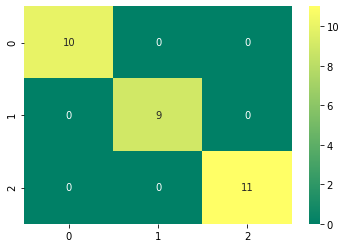

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_2, annot=True, cmap = 'summer')
plt.show()

### 4.2.2. Logistic Regression

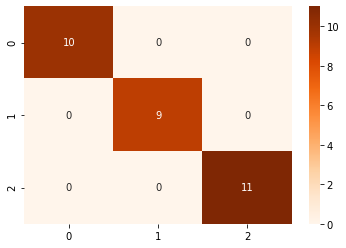

In [14]:
cm_3 = confusion_matrix(y_test, y_pred_3)
sns.heatmap(cm_3, annot=True, cmap='Oranges')
plt.show()

## 5. Visualization

### 5.1. K-NN

In [15]:
# from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt

# cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
# cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# x_min, x_max = x_test['SepalLengthCm'].min() - .1, x_test['SepalLengthCm'].max() + .1
# y_min, y_max = x_test['SepalWidthCm'].min() - .1, x_test['SepalWidthCm'].max() + .1

# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Z = clf_1.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# plt.scatter(x_test['SepalLengthCm'], x_test['SepalWidthCm'], c = y_test, cmap=cmap_bold)
# plt.xlabel('sepal length (cm)')
# plt.ylabel('sepal width (cm)')

# plt.colorbar()

# plt.show()

## 6. Summary

In [16]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Model', 'Accuracy'], ['K-NN',0.8],['Naive Bayes',1],['Logistic Regression',1.0],
           ['SVM',1.0],['Decision Trees',1.0]])
print(t.draw())

+---------------------+----------+
|        Model        | Accuracy |
+=====================+==========+
| K-NN                | 0.800    |
+---------------------+----------+
| Naive Bayes         | 1        |
+---------------------+----------+
| Logistic Regression | 1        |
+---------------------+----------+
| SVM                 | 1        |
+---------------------+----------+
| Decision Trees      | 1        |
+---------------------+----------+


In [19]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("clf_1.pkl","wb")
pickle.dump(clf_1, pickle_out)
pickle_out.close()

In [20]:
pickle_out = open("clf_2.pkl","wb")
pickle.dump(clf_2, pickle_out)
pickle_out.close()

In [21]:
pickle_out = open("clf_3.pkl","wb")
pickle.dump(clf_3, pickle_out)
pickle_out.close()

In [22]:
pickle_out = open("clf_4.pkl","wb")
pickle.dump(clf_4, pickle_out)
pickle_out.close()

In [23]:
pickle_out = open("clf_5.pkl","wb")
pickle.dump(clf_5, pickle_out)
pickle_out.close()